In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:97% !important; }</style>"))

import networkx as nx
import random
import matplotlib.pyplot as plt
import sys
import os
import json
import numpy as np
import pandas as pd
import glob
import seaborn as sns

/var/folders/dc/ckm_vfws7gj46c116ltm28k00000gn/T/ipykernel_82717/3255959764.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# Plot Results

In [2]:
def is_float(element) -> bool:
    try:
        float(element)
        return True
    except ValueError:
        return False
    
densities = []
relations = []
bonferronies = []
df = pd.DataFrame(columns=['node_number', 'density', 'weight_ratio', 'node_number_ratio', 'graph_type', 'power',
                           'probability_S_in_G1', 'p_value_G1', 'p_value_G2', 'optimal_bs_1', 'optimal_bs_1', 'p_bonferroni'])
bonf_files = glob.glob('configs56_2/*.json')
for ind, js_fn in enumerate(bonf_files):
    js = json.load(open(js_fn))
    df.loc[ind, :] = list(map(lambda x: float(x) if is_float(x) else x, js_fn.rstrip('.json').split(os.path.sep)[-1].split('_')[-5:])) + \
    [js['power'], js['probability_S_in_G1'], js['p_value_G1'], js['p_value_G2'], js['optimal_bs_1'], 
     js['optimal_bs_2'], js['p_bonferroni']]

df = df.sort_values(by=['node_number', 'density', 'weight_ratio', 'node_number_ratio', 'p_bonferroni'])
df.loc[:, 'node_number'] = df['node_number'].astype(int)
df.loc[:, 'significant'] = df['p_bonferroni'] < 0.05
df.loc[:, 's_nodes'] = df['node_number_ratio'] * df['node_number']
df

,node_number,density,weight_ratio,node_number_ratio,graph_type,power,probability_S_in_G1,p_value_G1,p_value_G2,optimal_bs_1,optimal_bs_1,p_bonferroni,significant,s_nodes
8,1000,0.1,1.0,0.005,clique,49.828921,0.0,1,1,T,T,999999999999998.5,False,5.0
38,1000,0.1,1.0,0.005,path,49.828921,0.0,1,1,T,T,999999999999998.5,False,5.0
1,1000,0.1,1.0,0.01,path,99.657843,0.0,1,1,T,T,999999999999997064397369376768.0,False,10.0
14,1000,0.1,1.0,0.01,clique,99.657843,0.0,1,1,T,T,999999999999997064397369376768.0,False,10.0
16,1000,0.1,1.1,0.005,clique,13.965784,0.000063,0.0,0.0,TTTTT,TTTTT,0.0,True,5.0
44,1000,0.1,1.1,0.005,path,13.965784,0.000063,0.0,0.0,TTTTT,TTTTT,0.0,True,5.0
17,1000,0.1,1.1,0.01,path,18.965784,0.000002,0.0,0.0,TTTTTTTTTT,TTTTTTTTTT,0.0,True,10.0
28,1000,0.1,1.1,0.01,clique,18.965784,0.000002,0.0,0.0,TTTTTTTTTT,TTTTTTTTTT,0.0,True,10.0
20,1000,0.1,1.2,0.005,clique,13.965784,0.000063,0.0,0.0,TTTTT,TTTTT,0.0,True,5.0
24,1000,0.1,1.2,0.005,path,13.965784,0.000063,0.0,0.0,TTTTT,TTTTT,0.0,True,5.0


In [6]:
df[~df['significant']].sort_values(by='weight_ratio')

,node_number,density,weight_ratio,node_number_ratio,graph_type,power,probability_S_in_G1,p_value_G1,p_value_G2,optimal_bs_1,optimal_bs_1,p_bonferroni,significant,s_nodes
8,1000,0.1,1.0,0.005,clique,49.828921,0.0,1,1,T,T,999999999999998.5,False,5.0
38,1000,0.1,1.0,0.005,path,49.828921,0.0,1,1,T,T,999999999999998.5,False,5.0
1,1000,0.1,1.0,0.01,path,99.657843,0.0,1,1,T,T,999999999999997064397369376768.0,False,10.0
14,1000,0.1,1.0,0.01,clique,99.657843,0.0,1,1,T,T,999999999999997064397369376768.0,False,10.0
19,10000,0.1,1.0,0.005,path,652.097907,0.0,0.0002,0.0002,TT,TT,3999202626268742868469497802594585606428765608...,False,50.0
30,10000,0.1,1.0,0.005,clique,664.385619,0.0,1,1,T,T,9999999999999547592671736492949212017263615293...,False,50.0
10,10000,0.1,1.0,0.01,clique,1328.771238,0.0,1,1,T,T,inf,False,100.0
37,10000,0.1,1.0,0.01,path,1316.483526,0.0,0.0002,0.0002,TT,TT,inf,False,100.0
2,1000,0.1,1.8,0.01,path,72.76049,0.0,0.0,0.0,TTTT,TTTT,64015655018098.46875,False,10.0
47,1000,0.1,2.0,0.005,path,22.931569,0.0,0.0,0.0,TTTT,TTTT,0.064016,False,5.0


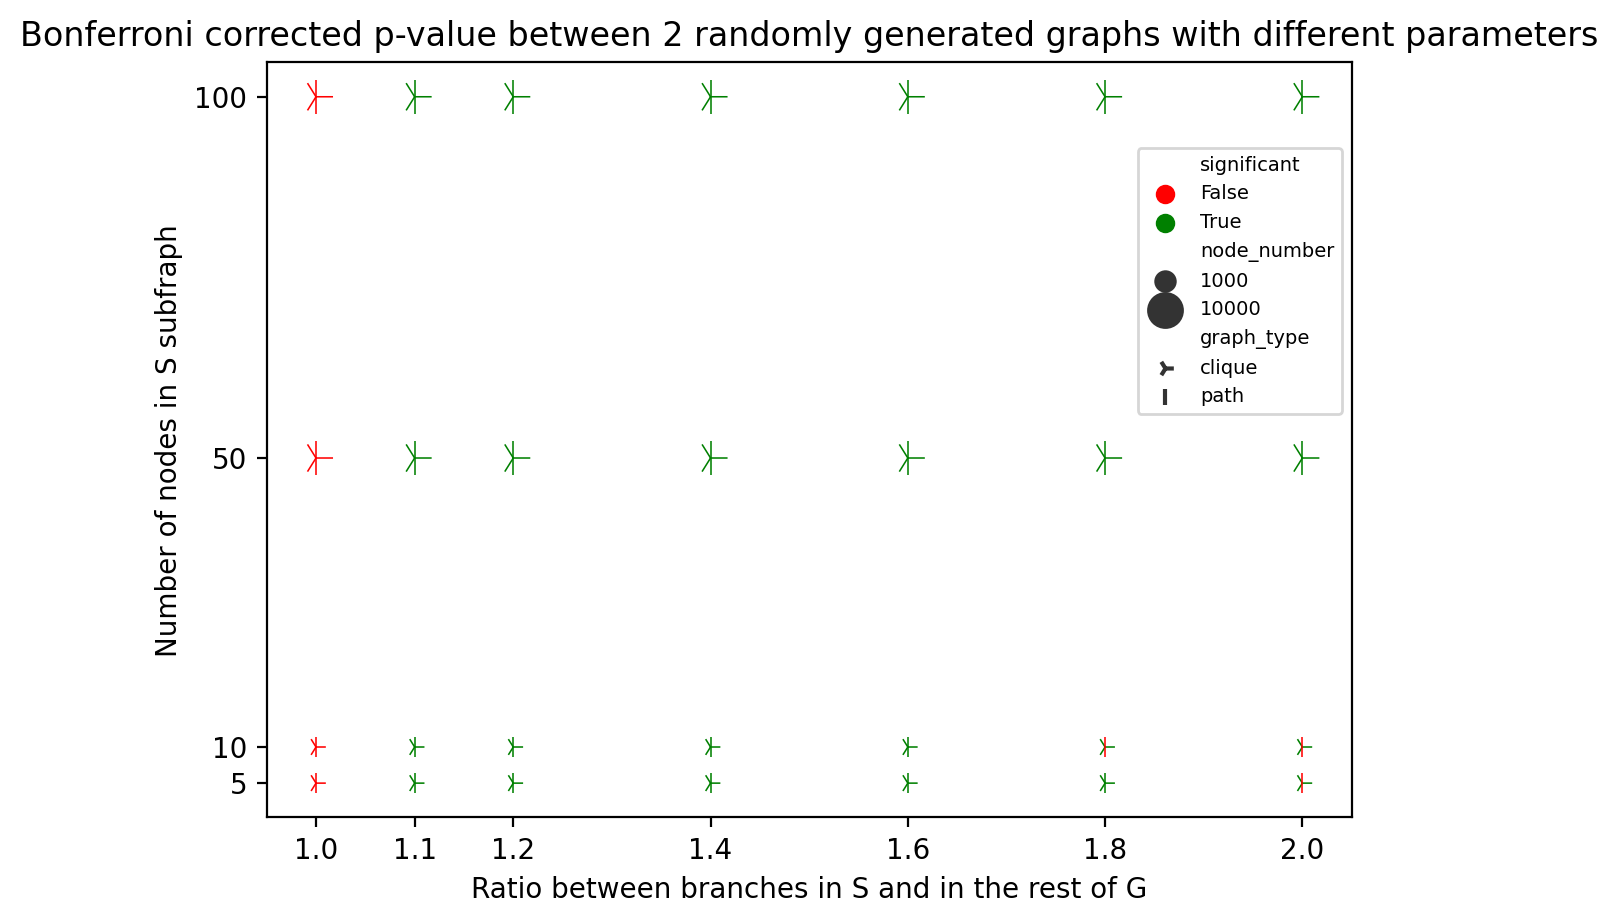

In [3]:
markers = {"path": '|', "clique": '4'}
plt.figure(figsize=(7,5), dpi=200)
sns.scatterplot(data=df, x='weight_ratio', y='s_nodes', size='node_number', hue='significant', palette=['r', 'g'], style='graph_type', markers=markers, sizes=(50,150))
plt.yticks([5, 10, 50, 100])
plt.xticks([1, 1.1, 1.2, 1.4, 1.6, 1.8, 2])
plt.legend(fontsize=7, bbox_to_anchor=(0.5, 0., 0.5, 0.9)) # using a size in points
plt.title('Bonferroni corrected p-value between 2 randomly generated graphs with different parameters')
plt.xlabel('Ratio between branches in S and in the rest of G')
plt.ylabel('Number of nodes in S subfraph')
plt.savefig('bonferroni.png', bbox_inches='tight')

# Draw graph

In [24]:
gpath = 'debug_CTD2/G2_1000_0.1_2.0_0.01_path.csv'
g1_df = pd.read_csv(gpath)
spath = 'debug_CTD2/S_1000_0.1_2.0_0.01_path.csv'
s_df = pd.read_csv(spath)
s_nodes = s_df.values.flatten()
g1 = nx.from_numpy_matrix(g1_df.values)
s_subgraph = g1.subgraph(s_nodes)

In [48]:
s_and_neigh = []
for edge in g1.edges():
    if (edge[0] == 54) or (edge[1] ==54):# or (edge[0] in s_nodes and edge[1] in s_nodes):
        s_and_neigh.append(edge[0])
        s_and_neigh.append(edge[1])
s_and_neigh = list(set(s_and_neigh))
s_and_neigh_subgraph = g1.subgraph(s_and_neigh)

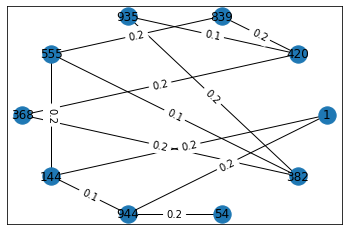

In [52]:
edge_weights = nx.get_edge_attributes(s_subgraph,'weight')

pos=nx.circular_layout(s_subgraph)
nx.draw_networkx(s_subgraph, pos=pos)
# nx.draw_networkx(s_subgraph, pos=pos, node_color = 'red', edge_color = 'red')
nx.draw_networkx_edge_labels(s_subgraph, pos, edge_labels = edge_weights)
plt.show()

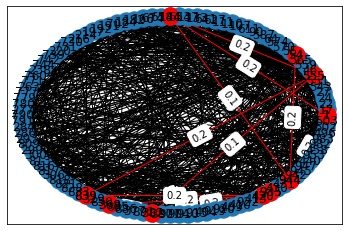

In [42]:
edge_weights = nx.get_edge_attributes(s_subgraph,'weight')

pos=nx.circular_layout(s_and_neigh_subgraph)
nx.draw_networkx(s_and_neigh_subgraph, pos=pos)
nx.draw_networkx(s_subgraph, pos=pos, node_color = 'red', edge_color = 'red')
nx.draw_networkx_edge_labels(s_and_neigh_subgraph, pos, edge_labels = edge_weights)
plt.show()

# pos=nx.circular_layout(G2)
# nx.draw_networkx(G2, pos=pos)
# nx.draw_networkx(nx.induced_subgraph(G2, S), pos=pos, node_color = 'blue', edge_color = 'green')
# #nx.draw_networkx_edge_labels(G2, pos, edge_labels = edge_weights)
# plt.show()